# this notebook generates venn diagram from two lists of genes

In [1]:
import pandas as pd
import numpy as np
import sys

In [2]:
import gc

In [5]:
from matplotlib import pyplot as plt
import seaborn as sn
from matplotlib_venn import venn2

In [4]:
import warnings 
warnings.filterwarnings("ignore")

## plot function

In [8]:
#getting venn diagram
def zc_venn_diagram( list1, list2, name1, name2, 
                    title = None, ax = None,
                    print_elements = False, 
                    show_fig = True, save_fig = False, save_file_name = 'curr_venn.png'):
    """This function makes a venn diagram with some basic customized properties
    @param list1, list2: the two lists of elements to make venn diagram from. Can be in python list, or pd.Series or np array etc list-like objects
    @param name1, name2: the names for each list of elements that will be plotted on the diagram circle
    @param title: title of the plot
    @param ax: can pass-in an matplotlib Axes object, if not, will create one here
    @param print_elements: print out list1-only, list2-only and intersected elements
    @param show_fig, save_fig: boolean flags to set
    @param save_file_name: if save_fig is set True, need to pass-in a FULL file name to save (eg. venn1.png). If not, will use the defaul curr_venn.png in the current dir
    @return the ax for this plot"""

    # create ax 
    if( not ax):
        f, a = plt.subplots()
    else:
        a = ax

    # plot the venn diagram
    s1 = set(list1)
    s2 = set( list2)
    venn2( [ s1, s2 ], (name1, name2), ax= a)

    if( print_elements):
        intersection_ls = s1.intersection( s2)
        
        s1_only = s1- intersection_ls
        s2_only = s2 - intersection_ls

        print( f"intersection: {intersection_ls}")
        
        print( f"{name1} has: ")
        print( f"{s1_only }" )
        
        print( f"{name2} has: ")
        print( f"{s2_only}" )        
        

    # customize plotting 
    if( title ):
        t = a.set_title(title )

    if( save_fig):
        plt.savefig( save_file_name, bbox_inches='tight' )
        
    if( show_fig):
        plt.show()

    return a

## example usage

In [11]:
te1 = ['(AGA)n',  '(TGCC)n', 'B1F', 'B1_Mm', 'B2_Mm2', 'Charlie15b', 'ETnERV-int', 'IAPEY4_I'] + ['RLTR4_MM-int', 'RLTR4_Mm', 'RLTR4_Mm', 'RLTR4_Mm', 'RLTR4_Mm', 'RLTR4_Mm', 'RLTR6C_Mm', 'RLTR6_Mm', 'RLTR6_Mm', 'RLTR9E', 'RMER17B2', 'RMER17D', 'RMER19B', 'RMER1B', 'Tigger18a']
te2 = ['RLTR4_MM-int', 'L1MC2', 'RMER17B2', 'IAPLTR1_Mm', 'RLTR4_Mm', 'RLTR4_MM-int', 'RLTR4_MM-int', 'RLTR4_MM-int', 'RLTR4_MM-int', 'RLTR4_MM-int']

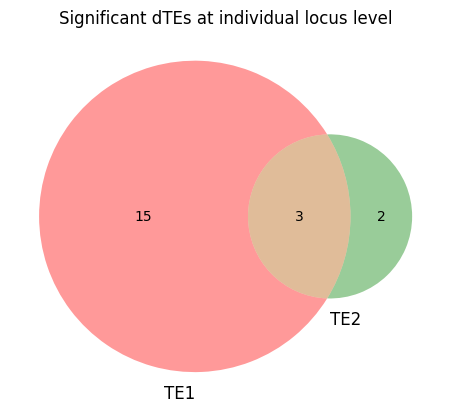

hi


In [16]:
a = zc_venn_diagram( te1, te2, 'TE1', 'TE2', 
                    title = "Significant dTEs at individual locus level", ax = None, 
                    show_fig = True, save_fig = False, ) #save_file_name = 'curr_venn.png')

hi


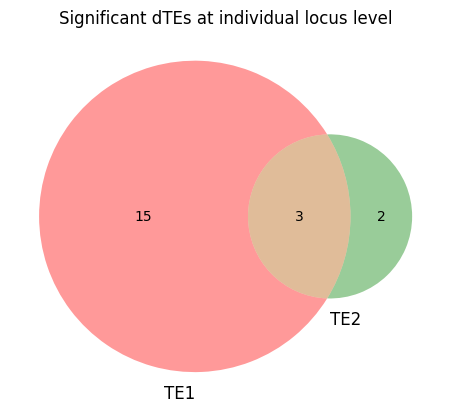

In [17]:
# with saving 
a = zc_venn_diagram( te1, te2, 'TE1', 'TE2', 
                    title = "Significant dTEs at individual locus level", ax = None, 
                    show_fig = False, save_fig = True, save_file_name = 'test_TE_venn.png')